# Sieci neuronowe i deep learning - Lab 4

# Konwolucyjne sieci neuronowe

## Ćwiczenie 1

- Zaimportuj zbiór danych mnist, korzystając z funkcji mnist.load_data() https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
- Stwórz dwa modele sieci neuronowych: jeden typu MLP, drugi z warstwami konwolucyjnymi i jedną lub dwiema warstwami gęstymi na końcu (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) i MaxPooling (https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
- Wytrenuj obydwa modele, porównaj wyniki na zbiorach testowych oraz liczbę parametrów w każdej sieci

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Ładowanie i przygotowanie danych
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizacja danych

# Reshape dla modelu konwolucyjnego (dodanie wymiaru kanału)
x_train_cnn = x_train[..., tf.newaxis]
x_test_cnn = x_test[..., tf.newaxis]

In [3]:
# Model MLP
mlp_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu MLP
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Model CNN
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu CNN
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Trening modelu MLP
mlp_history = mlp_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Trening modelu CNN
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=5, validation_data=(x_test_cnn, y_test))

Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2395 - accuracy: 0.9306 - val_loss: 0.1548 - val_accuracy: 0.9473
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1004 - accuracy: 0.9696 - val_loss: 0.0844 - val_accuracy: 0.9734
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0692 - accuracy: 0.9783 - val_loss: 0.0868 - val_accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9836 - val_loss: 0.0802 - val_accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0419 - accuracy: 0.9863 - val_loss: 0.0800 - val_accuracy: 0.9772
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1389 - accuracy: 0.9575 - val_loss: 0.0456 - val_accuracy: 0.9848
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0397 - val_accuracy: 0.

In [6]:
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test, y_test, verbose=2)
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)
print(f"MLP - Dokładność na zbiorze testowym: {mlp_test_acc:.4f}")
print(f"CNN - Dokładność na zbiorze testowym: {cnn_test_acc:.4f}")
print(f"Liczba parametrów w modelu MLP: {mlp_model.count_params()}")
print(f"Liczba parametrów w modelu CNN: {cnn_model.count_params()}")

313/313 - 0s - loss: 0.0800 - accuracy: 0.9772 - 274ms/epoch - 875us/step
313/313 - 1s - loss: 0.0310 - accuracy: 0.9906 - 583ms/epoch - 2ms/step
MLP - Dokładność na zbiorze testowym: 0.9772
CNN - Dokładność na zbiorze testowym: 0.9906
Liczba parametrów w modelu MLP: 109386
Liczba parametrów w modelu CNN: 121930


## Ćwiczenie 2

 - Korzystając z pola .layers modelu konwolucyjnego oraz poa output każdej warstwy, wyodrębnij wyjścia poszczególnych warstw konwolucyjnych, stwórz modele pomocnicze pozwalające wyciągać aktywacje w warstwach konwolucyjnych:
     
 - zwizualizuj aktywacje wybranych wastw, korzystając z metody .predict() utworzonych modeli pomocniczych

1/1 [==============================] - 0s 76ms/step


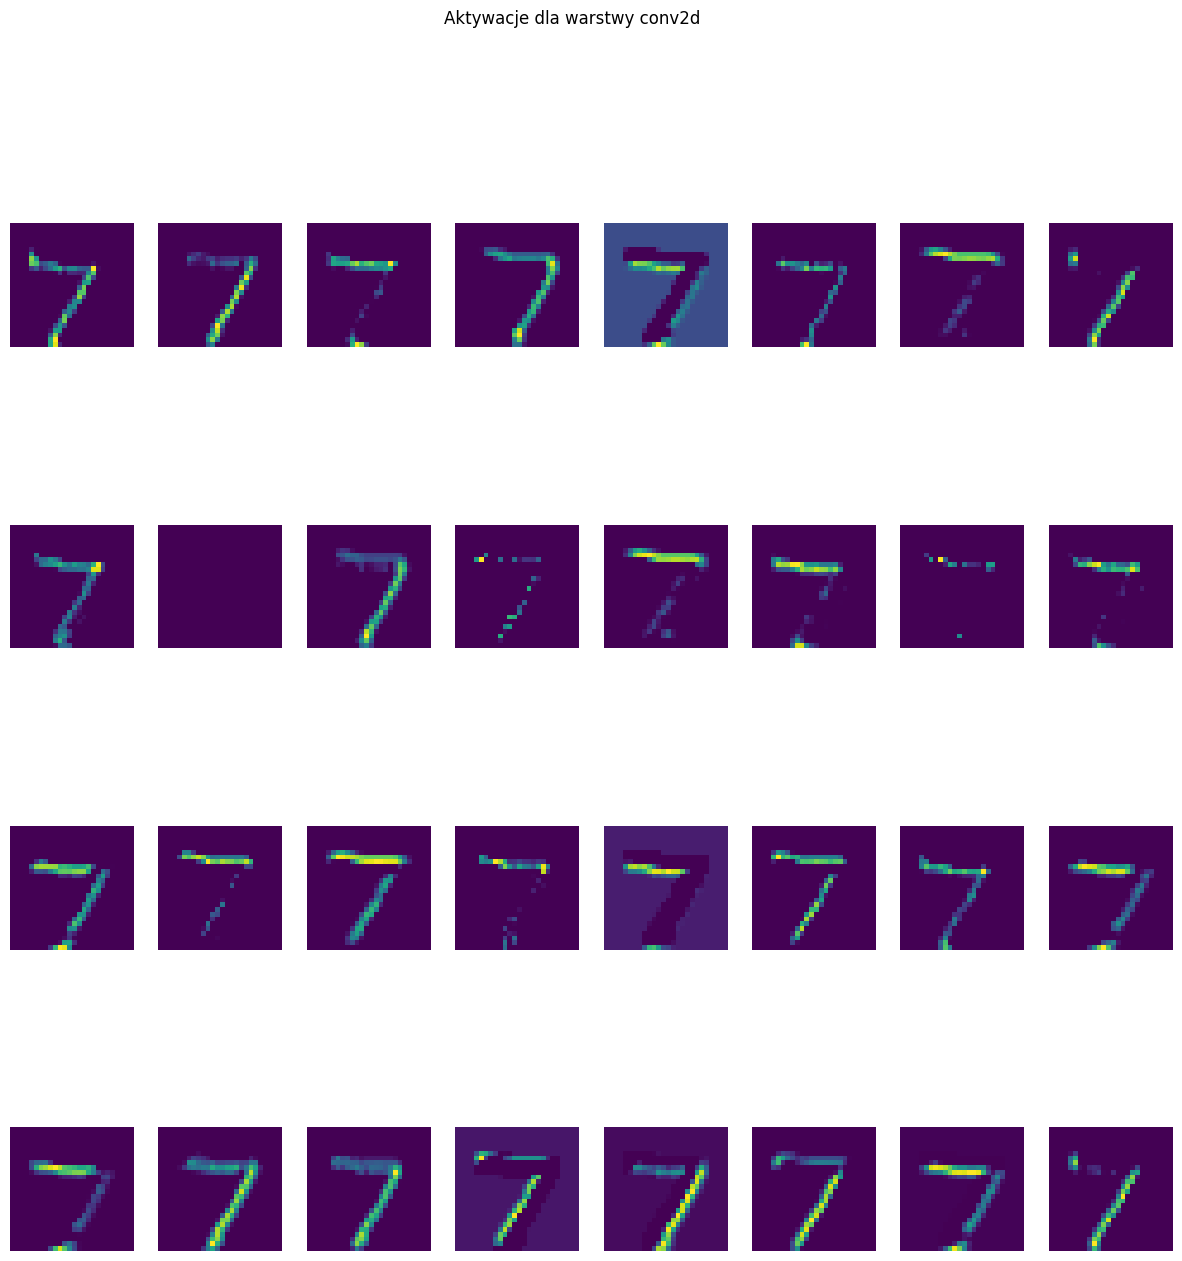

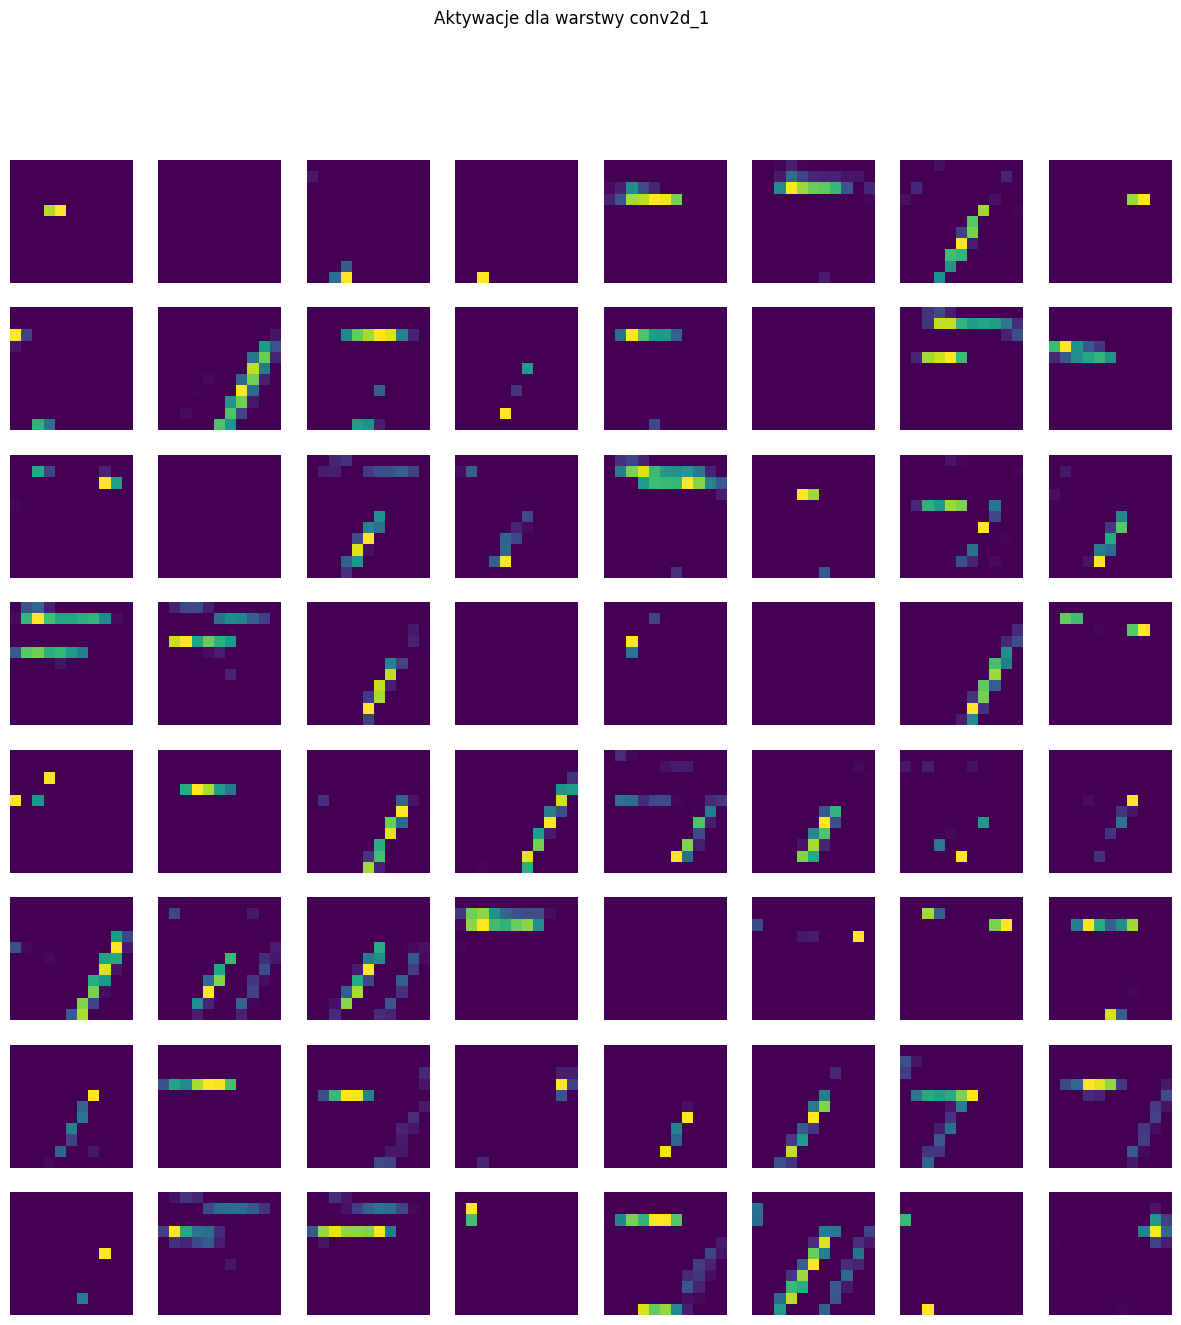

In [7]:
###################################

import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt

# Zakładamy, że `cnn_model` jest już wytrenowanym modelem konwolucyjnym.

# Indeksy warstw konwolucyjnych w modelu
conv_layer_indices = [i for i, layer in enumerate(cnn_model.layers) if isinstance(layer, tf.keras.layers.Conv2D)]

# Wyjścia poszczególnych warstw konwolucyjnych
conv_layer_outputs = [cnn_model.layers[i].output for i in conv_layer_indices]

# Tworzymy model pomocniczy
activations_model = models.Model(inputs=cnn_model.input, outputs=conv_layer_outputs)

# Wybieramy przykład obrazu z danych testowych (np. pierwszy obraz)
test_image = x_test_cnn[0:1]  # Dodanie wymiaru batchu

# Obliczamy aktywacje
activations = activations_model.predict(test_image)

# Wizualizacja aktywacji poszczególnych wybranych warstw konwolucyjnych
layer_names = [cnn_model.layers[i].name for i in conv_layer_indices]

for layer_name, activation in zip(layer_names, activations):
    num_filters = activation.shape[-1]  # Liczba filtrów
    size = activation.shape[1]  # Rozmiar aktywacji
    
    # Ustawienia wielkości siatki wykresów
    n_cols = 8
    n_rows = num_filters // n_cols if num_filters % n_cols == 0 else (num_filters // n_cols) + 1
    
    plt.figure(figsize=(15, 15))
    plt.suptitle(f'Aktywacje dla warstwy {layer_name}')
    
    for i in range(num_filters):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
    
    plt.show()

######################################

## Ćwiczenie 3

 Zaimportuj zbiór danych cifar10, korzystając z funkcji cifar10.load_data() https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
 - Przeanalizuj dane, sprawdź, czy nie trzeba normalizować. Zwizualizuj kilka przykładowych obrazów
- Stwórz model konwolucyjnej sieci neuronowej. Skompiluj i wytrenuj model, wyświetl krzywe uczenia, zarówno dla dokładności jak i funkcji straty dla zbiorów treningowego i testowego (walidacyjnego). Spróbuj przetestować kilka architektur i wybierz najlepszą, jaką uda się uzyskać


C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_114820\1019776009.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


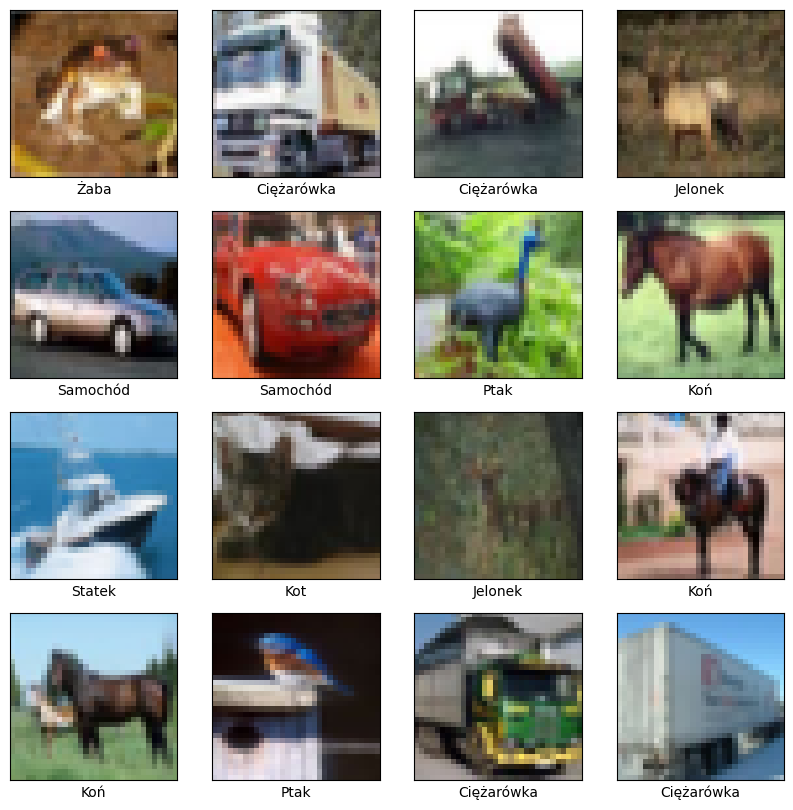

In [8]:
from tensorflow.keras.datasets import cifar10

import tensorflow as tf
import matplotlib.pyplot as plt

# Załadowanie zbioru danych CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizacja danych
x_train, x_test = x_train / 255.0, x_test / 255.0  # Upewniamy się, że piksele są w zakresie [0, 1]

# Wyświetlenie kilku przykładowych obrazów i ich etykiet
class_names = ["Samolot", "Samochód", "Ptak", "Kot", "Jelonek", "Pies", "Żaba", "Koń", "Statek", "Ciężarówka"]

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()


In [9]:
from tensorflow.keras import layers, models

def build_cnn_model():
    model = models.Sequential()
    
    # Warstwy konwolucyjne i MaxPooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Warstwy gęste
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 klas wyjściowych

    return model

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

Epoch 1/20
782/782 [==============================] - 11s 12ms/step - loss: 1.5553 - accuracy: 0.4335 - val_loss: 1.3046 - val_accuracy: 0.5307
Epoch 2/20
782/782 [==============================] - 9s 11ms/step - loss: 1.2157 - accuracy: 0.5707 - val_loss: 1.1476 - val_accuracy: 0.5957
Epoch 3/20
782/782 [==============================] - 11s 15ms/step - loss: 1.0641 - accuracy: 0.6277 - val_loss: 1.0482 - val_accuracy: 0.6314
Epoch 4/20
782/782 [==============================] - 9s 12ms/step - loss: 0.9732 - accuracy: 0.6589 - val_loss: 0.9888 - val_accuracy: 0.6535
Epoch 5/20
782/782 [==============================] - 10s 12ms/step - loss: 0.8932 - accuracy: 0.6889 - val_loss: 0.9213 - val_accuracy: 0.6813
Epoch 6/20
782/782 [==============================] - 9s 11ms/step - loss: 0.8312 - accuracy: 0.7096 - val_loss: 0.9264 - val_accuracy: 0.6812
Epoch 7/20
782/782 [==============================] - 9s 12ms/step - loss: 0.7798 - accuracy: 0.7275 - val_loss: 0.9326 - val_accuracy: 0.6

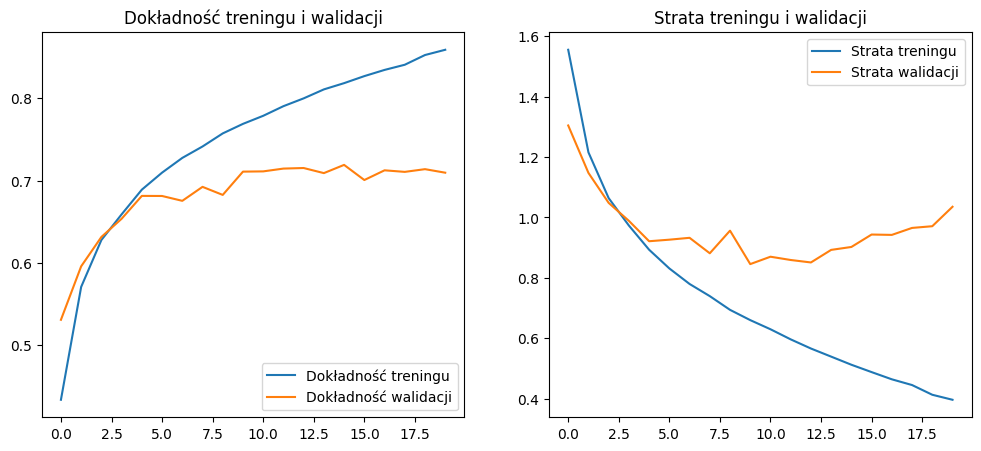

In [10]:
# Trening modelu z danymi walidacyjnymi
history = cnn_model.fit(x_train, y_train, epochs=20, 
                        validation_data=(x_test, y_test),
                        batch_size=64)

# Wyświetlenie krzywych uczenia
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))

    # Krzywa dokładności
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Dokładność treningu')
    plt.plot(epochs_range, val_acc, label='Dokładność walidacji')
    plt.legend(loc='lower right')
    plt.title('Dokładność treningu i walidacji')

    # Krzywa straty
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Strata treningu')
    plt.plot(epochs_range, val_loss, label='Strata walidacji')
    plt.legend(loc='upper right')
    plt.title('Strata treningu i walidacji')
    
    plt.show()

plot_learning_curves(history)


Epoch 1/20
782/782 [==============================] - 25s 31ms/step - loss: 1.9117 - accuracy: 0.2621 - val_loss: 1.5808 - val_accuracy: 0.4144
Epoch 2/20
782/782 [==============================] - 21s 27ms/step - loss: 1.5567 - accuracy: 0.4259 - val_loss: 1.3515 - val_accuracy: 0.5031
Epoch 3/20
782/782 [==============================] - 21s 27ms/step - loss: 1.3974 - accuracy: 0.4957 - val_loss: 1.2223 - val_accuracy: 0.5636
Epoch 4/20
782/782 [==============================] - 19s 25ms/step - loss: 1.2993 - accuracy: 0.5385 - val_loss: 1.1655 - val_accuracy: 0.5873
Epoch 5/20
782/782 [==============================] - 20s 25ms/step - loss: 1.2216 - accuracy: 0.5718 - val_loss: 1.0723 - val_accuracy: 0.6237
Epoch 6/20
782/782 [==============================] - 19s 24ms/step - loss: 1.1747 - accuracy: 0.5902 - val_loss: 1.0275 - val_accuracy: 0.6365
Epoch 7/20
782/782 [==============================] - 19s 24ms/step - loss: 1.1179 - accuracy: 0.6112 - val_loss: 0.9805 - val_accuracy:

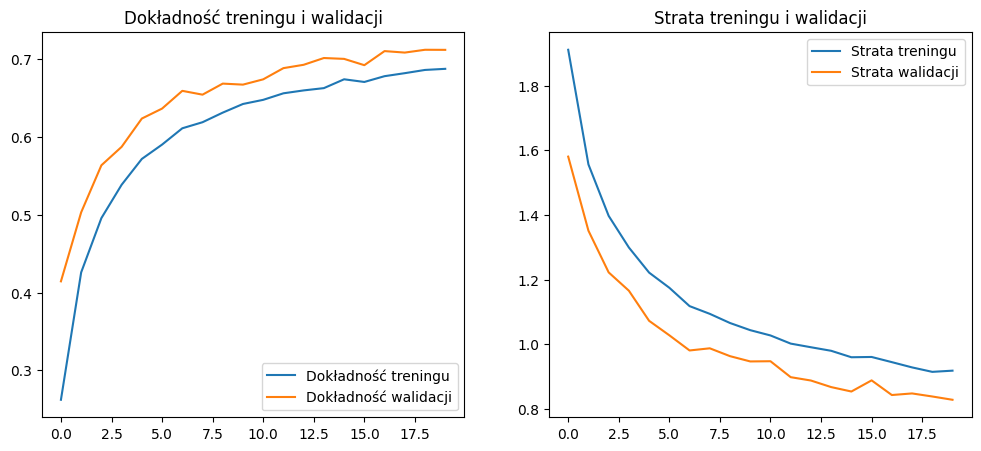

In [11]:
def build_advanced_cnn_model():
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

advanced_cnn_model = build_advanced_cnn_model()
advanced_cnn_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

history_advanced = advanced_cnn_model.fit(x_train, y_train, epochs=20, 
                                          validation_data=(x_test, y_test),
                                          batch_size=64)

plot_learning_curves(history_advanced)

# Ćwiczenie 4

Zwizualizuj aktywacje wybranych warstw konwolucyjnych modelu z ćwiczenia 3 (tak jak w ćwiczeniu 2 dla poprzedniego modelu)

1/1 [==============================] - 1s 676ms/step


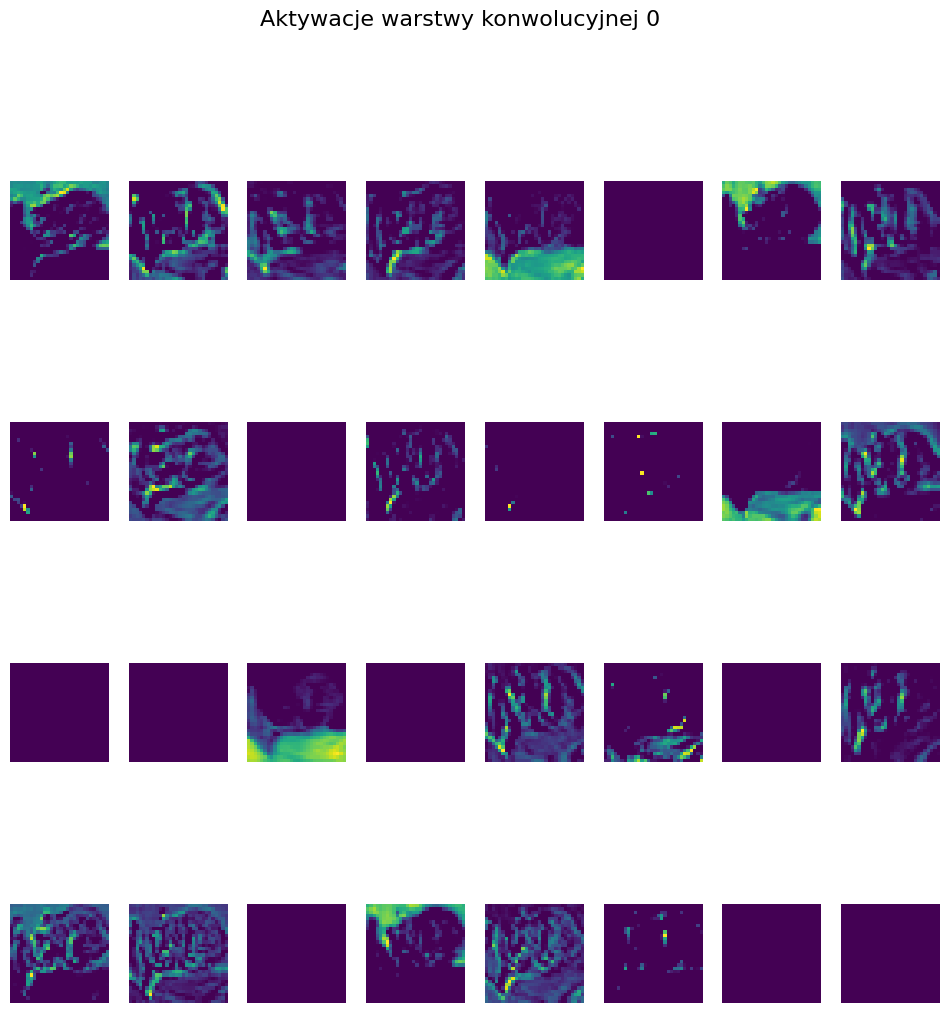

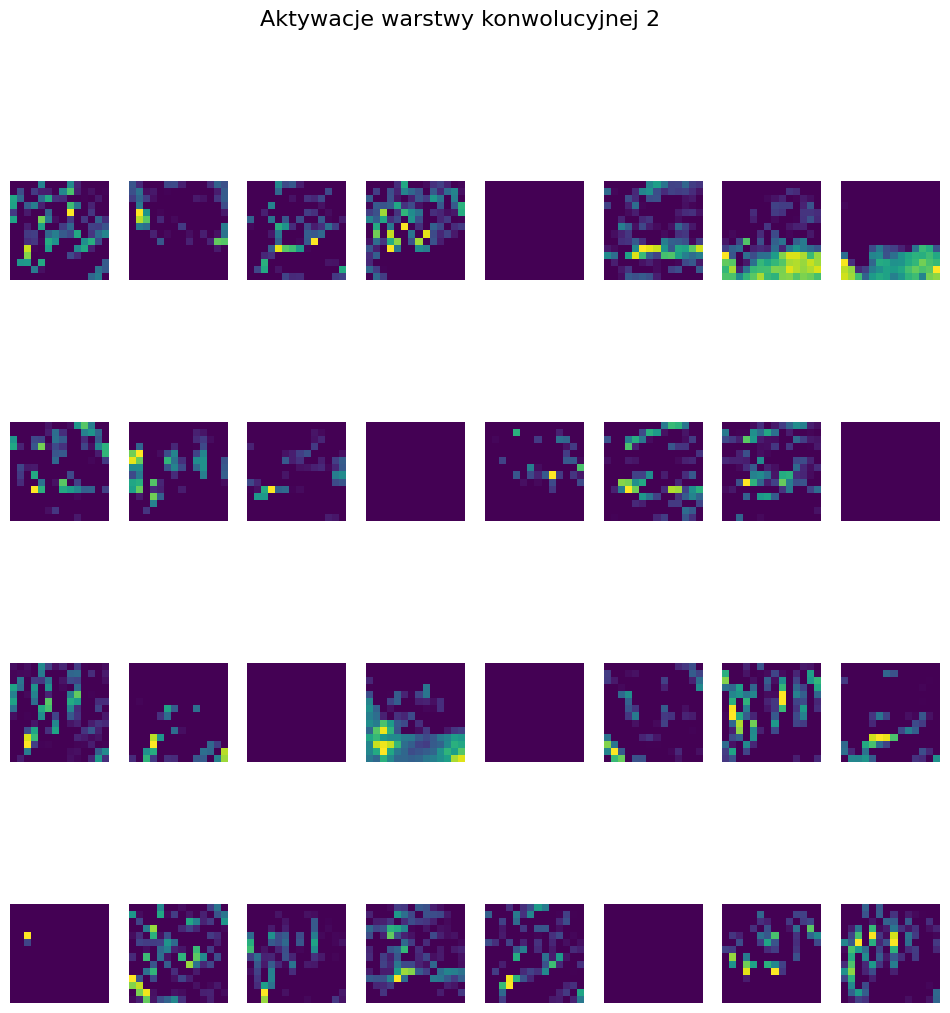

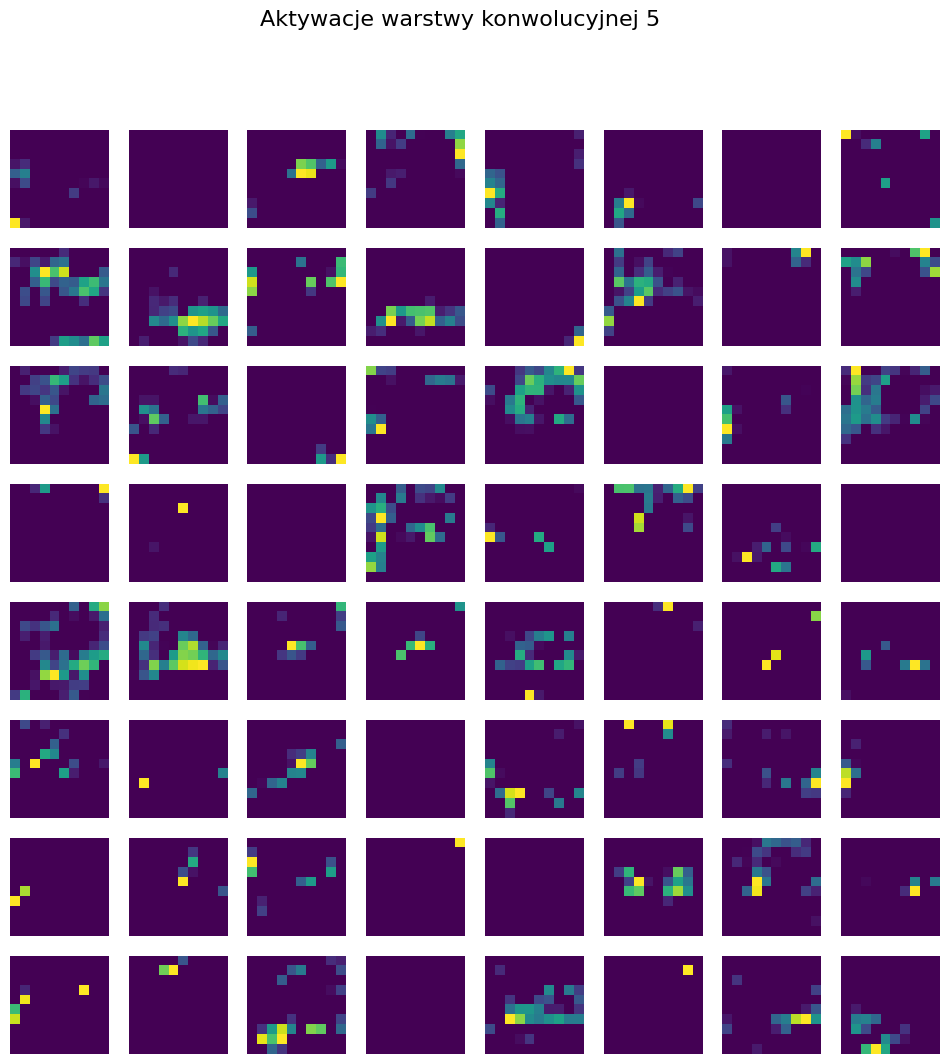

In [12]:
import numpy as np
from tensorflow.keras import models
import matplotlib.pyplot as plt

# Wybór warstw konwolucyjnych do wizualizacji (można zmienić indeksy według własnych potrzeb)
conv_layer_indices = [0, 2, 5]  # Indeksy warstw konwolucyjnych, np. pierwsza, druga, i trzecia warstwa konwolucyjna

# Wyciągnięcie wyjść poszczególnych wybranych warstw konwolucyjnych
outputs = [advanced_cnn_model.layers[i].output for i in conv_layer_indices]
activations_model = models.Model(inputs=advanced_cnn_model.input, outputs=outputs)

# Wybór pojedynczego obrazu do generowania aktywacji (np. pierwszego obrazu w zbiorze testowym)
sample_image = x_test[0].reshape(1, 32, 32, 3)

# Przeprowadzenie predykcji modelem pomocniczym w celu uzyskania aktywacji
activations = activations_model.predict(sample_image)

# Wizualizacja aktywacji dla każdej wybranej warstwy konwolucyjnej
for layer_index, layer_activations in enumerate(activations):
    num_filters = layer_activations.shape[-1]  # liczba filtrów
    size = layer_activations.shape[1]          # rozmiar (wysokość i szerokość aktywacji)
    
    # Wyświetlenie wszystkich filtrów w jednej warstwie
    n_cols = 8
    n_rows = num_filters // n_cols
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 12))
    
    fig.suptitle(f'Aktywacje warstwy konwolucyjnej {conv_layer_indices[layer_index]}', fontsize=16)
    
    for i in range(num_filters):
        row = i // n_cols
        col = i % n_cols
        ax[row, col].imshow(layer_activations[0, :, :, i], cmap='viridis')
        ax[row, col].axis('off')
        
    plt.show()


# Ćwiczenie 5

- Spróbuj poprawić możliwości generalizowania modelu z Ćwiczenia 3 dodając dwie rzeczy:
1. warstwę Dropout miedzy warstwami gęstymi (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
2. augmentację danych, tworząc fragment modelu typu Sequential, zawierającego warstwy wykonujace operacje augmentacji, np. layers.RandomFlip, layers.RandomRotation, layers.RandomZoom, layers.RandomTranslation
- model odpowiadający za augmentację wstaw jako pierwszy element w docelowym modelu sieci neuronowej. Wytrenuj model i wyświetl uzyskane wyniki

Epoch 1/20
782/782 [==============================] - 16s 17ms/step - loss: 1.8414 - accuracy: 0.3117 - val_loss: 1.6203 - val_accuracy: 0.4226
Epoch 2/20
782/782 [==============================] - 14s 17ms/step - loss: 1.5804 - accuracy: 0.4211 - val_loss: 1.4374 - val_accuracy: 0.4815
Epoch 3/20
782/782 [==============================] - 14s 18ms/step - loss: 1.4802 - accuracy: 0.4650 - val_loss: 1.2961 - val_accuracy: 0.5307
Epoch 4/20
782/782 [==============================] - 13s 17ms/step - loss: 1.4072 - accuracy: 0.4979 - val_loss: 1.2575 - val_accuracy: 0.5521
Epoch 5/20
782/782 [==============================] - 14s 18ms/step - loss: 1.3516 - accuracy: 0.5184 - val_loss: 1.2648 - val_accuracy: 0.5565
Epoch 6/20
782/782 [==============================] - 14s 18ms/step - loss: 1.3207 - accuracy: 0.5314 - val_loss: 1.2299 - val_accuracy: 0.5706
Epoch 7/20
782/782 [==============================] - 13s 16ms/step - loss: 1.2867 - accuracy: 0.5435 - val_loss: 1.1893 - val_accuracy:

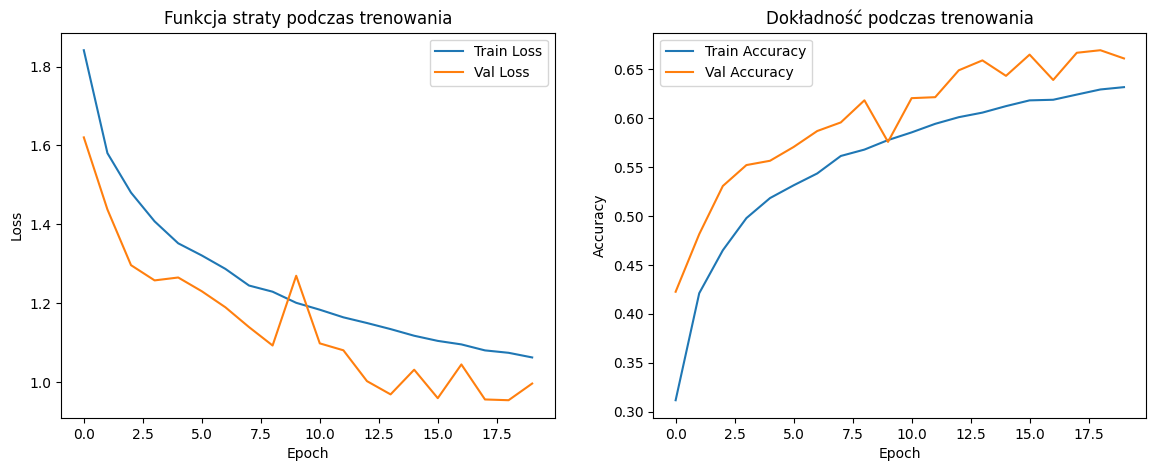

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Załadowanie i normalizacja zbioru danych CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizacja pikseli do przedziału [0, 1]

# Warstwy augmentacji danych
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)
])

# Architektura modelu CNN z warstwą augmentacji i Dropout
model = models.Sequential([
    data_augmentation,                          # Warstwa augmentacji jako pierwszy element
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),                        # Dropout przed ostatnią warstwą gęstą
    layers.Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_data=(x_test, y_test))

# Wyświetlenie wyników (dokładności i funkcji straty)
plt.figure(figsize=(14, 5))

# Krzywe uczenia - Funkcja straty
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Funkcja straty podczas trenowania')
plt.legend()

# Krzywe uczenia - Dokładność
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Dokładność podczas trenowania')
plt.legend()

plt.show()
